Розв'язок системи: x1 = 0.0, x2 = 3.0
Перевірка рівнянь у точці розв'язку:
Перше рівняння: 0.0
Друге рівняння: 0.0
Кількість ітерацій: 6


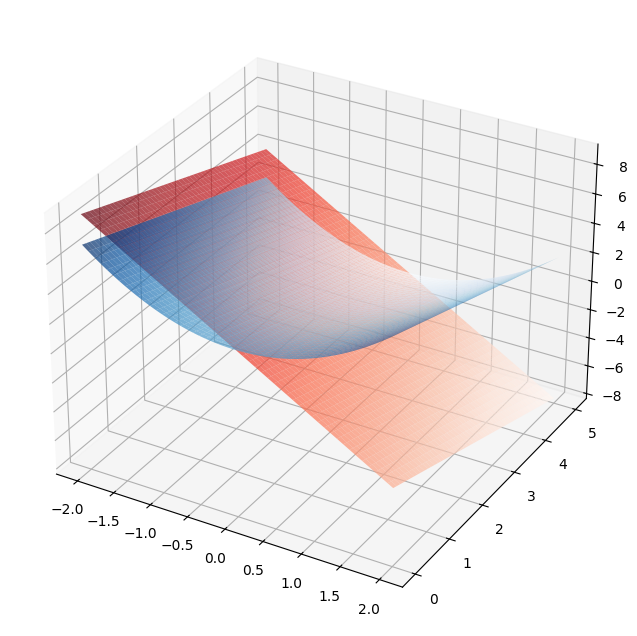

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve

p=8
x1 = np.linspace(-2, 2, 400)
x2 = np.linspace(0, 5, 400)
X1, X2 = np.meshgrid(x1, x2)


def system_of_equations(vars):
    x1, x2 = vars
    eq1 = x1**2 + 3 - x2
    eq2 = 3 * (1 - x1) - x2
    return [eq1, eq2]


initial_guess = [0, 0] 
solution, infodict,z,zz = fsolve(
    system_of_equations, initial_guess, full_output=True)

x1_solution, x2_solution = solution
iterations = infodict['nfev']  

eq1_check = x1_solution**2 + 3 - x2_solution
eq2_check = 3 * (1 - x1_solution) - x2_solution

print(f"Розв'язок системи: x1 = {x1_solution}, x2 = {x2_solution}")
print(f"Перевірка рівнянь у точці розв'язку:")
print(f"Перше рівняння: {eq1_check}")
print(f"Друге рівняння: {eq2_check}")
print(f"Кількість ітерацій: {iterations}")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, X1**2 + 3 - X2, cmap='Blues',
                alpha=0.7)
ax.plot_surface(X1, X2, 3 * (1 - X1) - X2, cmap='Reds',
                alpha=0.7)


ax.grid(True)

plt.show()

In [12]:
import numpy as np


def hooke_jeeves(f, x0, step_size=0.5, alpha=0.5, tol=1e-5, max_iter=500):
    x = np.array(x0)
    iterations = 0

    while step_size > tol and iterations < max_iter:
        iterations += 1
        new_x = exploratory_search(f, x, step_size)
        if f(new_x) < f(x):
            x = x + (new_x - x)
        else:
            step_size *= alpha

    return x, f(x), iterations


def exploratory_search(f, x, step_size):
    x_new = np.copy(x)
    for i in range(len(x)):
        f_current = f(x_new)
        x_new[i] += step_size
        if f(x_new) >= f_current:
            x_new[i] -= 2 * step_size
            if f(x_new) >= f_current:
                x_new[i] += step_size
    return x_new


def objective_function(x):
    return x[0]**2 + (x[1] - 3)**2


start_point = [-1,10]

solution, value, iter_count = hooke_jeeves(objective_function, start_point)

print(
    f"Знайдений мінімум у точці: x1 = {solution[0]}, x2 = {solution[1]}")
print(f"Кількість ітерацій: {iter_count}")

Знайдений мінімум у точці: x1 = 0, x2 = 3
Кількість ітерацій: 23


In [13]:
def phi(x):
    f1 = x[0]**2 + (p - 5) - x[1]
    f2 = (p - 5) * (1 - x[0]) - x[1]
    return f1**2 + f2**2
start_point = [1.0, 1.0]  # довільна початкова точка

solution, value, iter_count = hooke_jeeves(phi, start_point)

print(f"Розв’язок системи (мінімум Φ): x1 = {solution[0]}, x2 = {solution[1]}")
print(f"Значення Φ(x): {value}")
print(f"Кількість ітерацій: {iter_count}")


Розв’язок системи (мінімум Φ): x1 = 0.0, x2 = 3.0
Значення Φ(x): 0.0
Кількість ітерацій: 20


In [14]:
def hooke_jeeves_traced(f, x0, step_size=0.5, alpha=0.5, tol=1e-5, max_iter=500):
    x = np.array(x0)
    iterations = 0
    path = [x.copy()]

    while step_size > tol and iterations < max_iter:
        iterations += 1
        new_x = exploratory_search(f, x, step_size)
        if f(new_x) < f(x):
            x = x + (new_x - x)
        else:
            step_size *= alpha
        path.append(x.copy())

    return x, f(x), iterations, path

# Виклик
solution, value, iter_count, trajectory = hooke_jeeves_traced(phi, [1.0, 1.0])

# Збереження у файл
with open("trajectory.txt", "w") as file:
    for point in trajectory:
        file.write(f"{point[0]:.8f} {point[1]:.8f}\n")

print(f"Траєкторію збережено, кількість кроків: {len(trajectory)}")


Траєкторію збережено, кількість кроків: 21


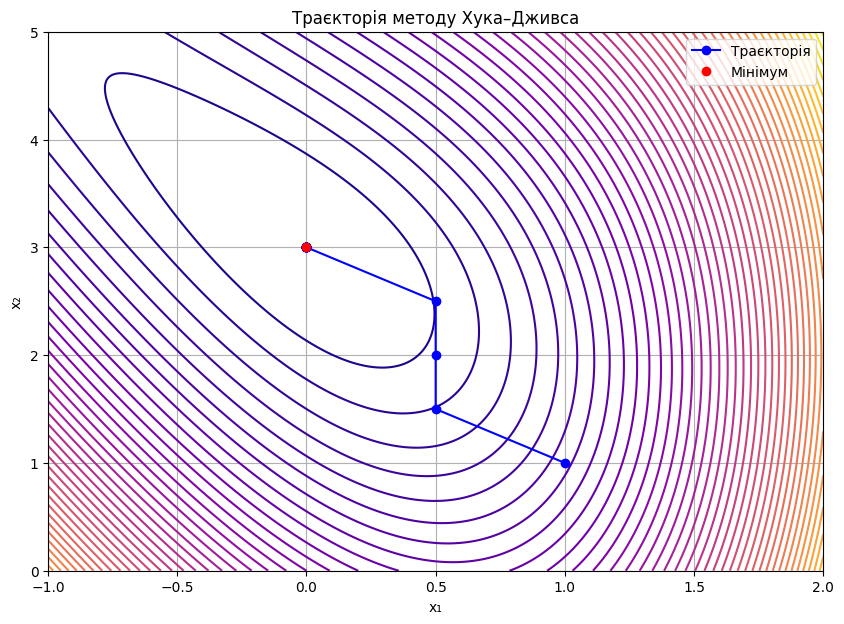

In [15]:

# === Побудова графіка траєкторії ===
path = np.array(path)

# Сітка для рівнів функції
x = np.linspace(-1, 2, 400)
y = np.linspace(0, 5, 400)
X, Y = np.meshgrid(x, y)
Z = np.array([[phi([xi, yi]) for xi in x] for yi in y])

# Побудова
plt.figure(figsize=(10, 7))
plt.contour(X, Y, Z, levels=50, cmap='plasma')
plt.plot(path[:, 0], path[:, 1], 'o-', label='Траєкторія', color='blue')
plt.plot(solution[0], solution[1], 'ro', label='Мінімум')
plt.title("Траєкторія методу Хука–Дживса")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.show()